In [1]:
import torch
import torch.nn as nn
from torch.functional import F
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, TensorDataset, DataLoader

from pytorchtools import EarlyStopping

import pandas as pd
import numpy as np
import cv2
import os

from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, balanced_accuracy_score

In [2]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size(0), -1)
    
def Network():
    network = nn.Sequential(
        nn.Conv2d(1, 16, 3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.Conv2d(16, 16, 3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        
    
        
        nn.Conv2d(16, 16, 4, stride=2, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        
        nn.Dropout(0.4),
        
        
        nn.Conv2d(16, 32, 3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        
        nn.Conv2d(32, 32, 3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        
        nn.Conv2d(32, 32, 4, stride=2, padding=1),
        nn.ReLU(),
        
        nn.Dropout(0.4),
        
        
        nn.Conv2d(32, 64, 4, stride=1, padding=1),
        nn.ReLU(),
        nn.Dropout(0.4),
        
        Flatten(),
        nn.Linear(64*6*6,100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )
    return network




def Network_Digits():
    network = nn.Sequential(
        nn.Conv2d(1, 16, 3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        
    
        nn.Conv2d(16, 16, 4, stride=2, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        
        nn.Dropout(0.4),
        
        
        nn.Conv2d(16, 32, 3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        
        nn.Conv2d(32, 32, 4, stride=2, padding=1),
        nn.ReLU(),
        
        nn.Dropout(0.4),
        
        
        nn.Conv2d(32, 64, 4, stride=1, padding=1),
        nn.ReLU(),
        nn.Dropout(0.4),
        
        Flatten(),
        nn.Linear(64*6*6,100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )
    return network

In [3]:
def data_train(path_benign, filenames_benign, path_adversarial, filenames_adversarial):
    '''For the classifier for digit n, all inputs from the benign data that are '.n' are with label 0.
        All the other inputs from the benign dataset, as well as all inputs from the adversarial datasat have label 1'''
    
    my_x = []
    my_y_np_0 = np.array([])
    my_y_np_1 = np.array([])
    my_y_np_2 = np.array([])
    my_y_np_3 = np.array([])
    my_y_np_4 = np.array([])
    my_y_np_5 = np.array([])
    my_y_np_6 = np.array([])
    my_y_np_7 = np.array([])
    my_y_np_8 = np.array([])
    my_y_np_9 = np.array([])
    
    for filename in filenames_benign:
        my_x.append(cv2.imread(os.path.join(path_benign, filename), 0))
        pre, ext = os.path.splitext(os.path.join(path_benign, filename))
    
    
        if(np.array(ext[1:]).astype(np.uint8) == np.array(0).astype(np.uint8)):
            my_y_np_0 = np.append(my_y_np_0,np.array(0).astype(np.uint8))
        else: 
            my_y_np_0 = np.append(my_y_np_0,np.array(1).astype(np.uint8))
            
        if (np.array(ext[1:]).astype(np.uint8) == np.array(1).astype(np.uint8)):   
            my_y_np_1 = np.append(my_y_np_1,np.array(0).astype(np.uint8))
        else: 
            my_y_np_1 = np.append(my_y_np_1,np.array(1).astype(np.uint8))
            
        if (np.array(ext[1:]).astype(np.uint8) == np.array(2).astype(np.uint8)):   
            my_y_np_2 = np.append(my_y_np_2,np.array(0).astype(np.uint8))
        else: 
            my_y_np_2 = np.append(my_y_np_2,np.array(1).astype(np.uint8))
            
        if (np.array(ext[1:]).astype(np.uint8) == np.array(3).astype(np.uint8)):   
            my_y_np_3 = np.append(my_y_np_3,np.array(0).astype(np.uint8))
        else: 
            my_y_np_3 = np.append(my_y_np_3,np.array(1).astype(np.uint8))
            
        if (np.array(ext[1:]).astype(np.uint8) == np.array(4).astype(np.uint8)):   
            my_y_np_4 = np.append(my_y_np_4,np.array(0).astype(np.uint8))
        else: 
            my_y_np_4 = np.append(my_y_np_4,np.array(1).astype(np.uint8))
            
        if (np.array(ext[1:]).astype(np.uint8) == np.array(5).astype(np.uint8)):   
            my_y_np_5 = np.append(my_y_np_5,np.array(0).astype(np.uint8))
        else: 
            my_y_np_5 = np.append(my_y_np_5,np.array(1).astype(np.uint8))
            
        if (np.array(ext[1:]).astype(np.uint8) == np.array(6).astype(np.uint8)):   
            my_y_np_6 = np.append(my_y_np_6,np.array(0).astype(np.uint8))
        else: 
            my_y_np_6 = np.append(my_y_np_6,np.array(1).astype(np.uint8))
            
        if (np.array(ext[1:]).astype(np.uint8) == np.array(7).astype(np.uint8)):   
            my_y_np_7 = np.append(my_y_np_7,np.array(0).astype(np.uint8))
        else: 
            my_y_np_7 = np.append(my_y_np_7,np.array(1).astype(np.uint8))
            
        if (np.array(ext[1:]).astype(np.uint8) == np.array(8).astype(np.uint8)):  
            my_y_np_8 = np.append(my_y_np_8,np.array(0).astype(np.uint8))
        else: 
            my_y_np_8 = np.append(my_y_np_8,np.array(1).astype(np.uint8))
            
        if (np.array(ext[1:]).astype(np.uint8) == np.array(9).astype(np.uint8)):  
            my_y_np_9 = np.append(my_y_np_9,np.array(0).astype(np.uint8))
        else: 
            my_y_np_9 = np.append(my_y_np_9,np.array(1).astype(np.uint8))
            
            
            
        
    for filename in filenames_adversarial:
        my_x.append(cv2.imread(os.path.join(path_adversarial, filename), 0))
        my_y_np_0= np.append(my_y_np_0, np.array(1).astype(np.uint8))
        my_y_np_1= np.append(my_y_np_1, np.array(1).astype(np.uint8))
        my_y_np_2= np.append(my_y_np_2, np.array(1).astype(np.uint8))
        my_y_np_3= np.append(my_y_np_3, np.array(1).astype(np.uint8))
        my_y_np_4= np.append(my_y_np_4, np.array(1).astype(np.uint8))
        my_y_np_5= np.append(my_y_np_5, np.array(1).astype(np.uint8))
        my_y_np_6= np.append(my_y_np_6, np.array(1).astype(np.uint8))
        my_y_np_7= np.append(my_y_np_7, np.array(1).astype(np.uint8))
        my_y_np_8= np.append(my_y_np_8, np.array(1).astype(np.uint8))
        my_y_np_9= np.append(my_y_np_9, np.array(1).astype(np.uint8))
    
    
    my_y_0 = torch.Tensor(torch.from_numpy(my_y_np_0).float())
    my_y_1 = torch.Tensor(torch.from_numpy(my_y_np_1).float())
    my_y_2 = torch.Tensor(torch.from_numpy(my_y_np_2).float())
    my_y_3 = torch.Tensor(torch.from_numpy(my_y_np_3).float())
    my_y_4 = torch.Tensor(torch.from_numpy(my_y_np_4).float())
    my_y_5 = torch.Tensor(torch.from_numpy(my_y_np_5).float())
    my_y_6 = torch.Tensor(torch.from_numpy(my_y_np_6).float())
    my_y_7 = torch.Tensor(torch.from_numpy(my_y_np_7).float())
    my_y_8 = torch.Tensor(torch.from_numpy(my_y_np_8).float())
    my_y_9 = torch.Tensor(torch.from_numpy(my_y_np_9).float())
    
    
    tensor_x = torch.Tensor(my_x)
    tensor_x = tensor_x.unsqueeze(1)

    return tensor_x, my_y_0, my_y_1, my_y_2, my_y_3, my_y_4, my_y_5, my_y_6, my_y_7, my_y_8, my_y_9

In [4]:
def data_train_benign(path, filenames):
    my_x = []
    my_y_np = np.array([])
    
    for filename in filenames:
        my_x.append(cv2.imread(os.path.join(path, filename), 0))
        pre, ext = os.path.splitext(os.path.join(path, filename))
        my_y_np = np.append(my_y_np, np.array(ext[1:]).astype(np.uint8))
        
    my_y = torch.from_numpy(my_y_np).float()
    
    tensor_x = torch.Tensor(my_x)
    tensor_x = tensor_x.unsqueeze(1)
    tensor_y = torch.Tensor(my_y)

    dataset = TensorDataset(tensor_x,tensor_y)
    
    return dataset

In [5]:
def data_train_both(path_benign, filenames_benign, path_adversarial, filenames_adversarial):
    '''A dataset with all training data, benign and adversarial'''
    
    my_x = []
    my_y_np = np.array([])
    
    for filename in filenames_benign:
        my_x.append(cv2.imread(os.path.join(path_benign, filename), 0))
        my_y_np= np.append(my_y_np, np.array(0).astype(np.uint8))
        
    for filename in filenames_adversarial:
        my_x.append(cv2.imread(os.path.join(path_adversarial, filename), 0))
        my_y_np= np.append(my_y_np, np.array(1).astype(np.uint8))
        
    my_y = torch.from_numpy(my_y_np).float()
    
    tensor_x = torch.Tensor(my_x)
    tensor_x = tensor_x.unsqueeze(1)
    tensor_y = torch.Tensor(my_y)

    dataset = TensorDataset(tensor_x,tensor_y)
    
    return dataset

In [6]:
def data_test(path, filenames):
    my_x = []    
    my_y_np = np.array([])
    
    
    for filename in filenames:
        
        my_x.append(cv2.imread(os.path.join(path, filename), 0))
        my_y_np= np.append(my_y_np, np.array(-1).astype(np.uint8))
        
    my_y = torch.from_numpy(my_y_np).float()
    
    tensor_x = torch.Tensor(my_x)
    tensor_x = tensor_x.unsqueeze(1)
    tensor_y = torch.Tensor(my_y)
    
    dataset = TensorDataset(tensor_x,tensor_y)
    return dataset

In [7]:
def train(digit, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping):
    '''Can be used to train both a digit specific network and digit classifier'''
    
    all_train_losses = []
    all_valid_losses = []
    
    criterion = nn.CrossEntropyLoss()


    
    for epoch in range(epochs):
        train_loss = 0
        train_acc = 0
        train_n = 0
        
        val_loss = 0
        val_acc = 0
        val_n = 0
        
        network.train()
        for i, (X,y) in enumerate(dataloader_train):
            X, y = X.cuda(), y.cuda()
            output = network(X)
            loss = criterion(output, y.long())
            opt.zero_grad()
            loss.backward()
            opt.step()

            train_loss += loss.item() * y.size(0)
            train_acc += (output.max(1)[1] == y).sum().item()
            train_n += y.size(0)
        
        train_loss = train_loss / train_n
        all_train_losses.append(train_loss)

        network.eval()
        for i, (X,y) in enumerate(dataloader_val):
            X, y = X.cuda(), y.cuda()        
            output = network(X)
            loss = criterion(output, y.long())
            val_loss += loss.item() * y.size(0)
            val_acc += (output.max(1)[1] == y).sum().item()
            val_n += y.size(0)
            
        val_loss = val_loss/val_n
        all_valid_losses.append(val_loss)

        early_stopping(val_loss, network)

        if early_stopping.early_stop:
            print("Early stopping")
            break
        
        scheduler.step()
        
        print('epoch:{}, \t lr:{}, \n train loss:{}, \t val loss:{}, \n train acc:{}, \t\t\t val acc:{} \n\n'.format(epoch, scheduler.get_last_lr() , train_loss, val_loss, train_acc/train_n, val_acc/val_n))
    
        
        
    # load the last checkpoint with the best model
    network.load_state_dict(torch.load('checkpoint_{}.pt'.format(digit)))

    return  network, all_train_losses, all_valid_losses

In [9]:
def predict_full(network_benign, network_0, network_1, network_2, network_3, network_4, network_5, network_6, network_7, network_8, network_9, dataloader):
    '''Predicts the digit on the images and bades on the prediction forwards the input to a digit specific 0-1 classifier'''
    
    network_benign.eval()
    network_0.eval()
    network_1.eval()
    network_2.eval()
    network_3.eval()
    network_4.eval()
    network_5.eval()
    network_6.eval()
    network_7.eval()
    network_8.eval()
    network_9.eval()
    
    n = 0
    
    preds = []
    
    for i, (X,y) in enumerate(dataloader):
        X = X.cuda()
        output = network_benign(X)
        pred_initial = output.max(1)[1].item()
        if pred_initial == 0: output_binary = network_0(X)
        if pred_initial == 1: output_binary = network_1(X)
        if pred_initial == 2: output_binary = network_2(X)
        if pred_initial == 3: output_binary = network_3(X)
        if pred_initial == 4: output_binary = network_4(X)
        if pred_initial == 5: output_binary = network_5(X)
        if pred_initial == 6: output_binary = network_6(X)
        if pred_initial == 7: output_binary = network_7(X)
        if pred_initial == 8: output_binary = network_8(X)
        if pred_initial == 9: output_binary = network_9(X)
            
        preds.append(output_binary.max(1)[1].item())

    return preds

In [10]:
path_train_benign = os.path.join(os.getcwd(), "ch01-train")
filenames_train_benign = os.listdir(path_train_benign)

path_train_adversarial = os.path.join(os.getcwd(), "ch02-train")
filenames_train_adversarial = os.listdir(path_train_adversarial)

path_test = os.path.join(os.getcwd(), "ch02-test")
filenames_test = os.listdir(path_test)

In [12]:
tensor_x, tensor_y_0, tensor_y_1, tensor_y_2, tensor_y_3, tensor_y_4, tensor_y_5, tensor_y_6, tensor_y_7, tensor_y_8 , tensor_y_9 = data_train(path_train_benign, filenames_train_benign, path_train_adversarial, filenames_train_adversarial)

In [19]:
dataset_train_0 = TensorDataset(tensor_x,tensor_y_0)
torch.save(dataset_train_0, 'dataset_train_0.pt')

dataset_train_1 = TensorDataset(tensor_x,tensor_y_1)
torch.save(dataset_train_1, 'dataset_train_1.pt')

dataset_train_2 = TensorDataset(tensor_x,tensor_y_2)
torch.save(dataset_train_2, 'dataset_train_2.pt')

dataset_train_3 = TensorDataset(tensor_x,tensor_y_3)
torch.save(dataset_train_3, 'dataset_train_3.pt')

dataset_train_4 = TensorDataset(tensor_x,tensor_y_4)
torch.save(dataset_train_4, 'dataset_train_4.pt')

dataset_train_5 = TensorDataset(tensor_x,tensor_y_5)
torch.save(dataset_train_5, 'dataset_train_5.pt')

dataset_train_6 = TensorDataset(tensor_x,tensor_y_6)
torch.save(dataset_train_6, 'dataset_train_6.pt')

dataset_train_7 = TensorDataset(tensor_x,tensor_y_7)
torch.save(dataset_train_7, 'dataset_train_7.pt')

dataset_train_8 = TensorDataset(tensor_x,tensor_y_8)
torch.save(dataset_train_8, 'dataset_train_8.pt')

dataset_train_9 = TensorDataset(tensor_x,tensor_y_9)
torch.save(dataset_train_9, 'dataset_train_9.pt')

# Train and save all digit-specific network that predict 0 or 1 (0-1 networks)

In [9]:
dataset_train = torch.load('dataset_train_0.pt')

train_set, val_set = torch.utils.data.random_split(dataset_train, [80000, 40000])

dataloader_train = DataLoader(train_set, batch_size = 128) 
dataloader_val = DataLoader(val_set, batch_size = 128) 


network = Network_Digits().cuda()
network.train()
epochs = 50
opt = torch.optim.Adam(network.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_0.pt')
network, all_train_losses, all_valid_losses = train(0, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping)

torch.save(network.state_dict(), 'network_0.pt')

Validation loss decreased (inf --> 0.005411).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.038484688440337776, 	 val loss:0.005410688187042251, 
 train acc:0.9897, 			 val acc:0.9983 


Validation loss decreased (0.005411 --> 0.002965).  Saving model ...
epoch:1, 	 lr:[0.001], 
 train loss:0.007511958993715234, 	 val loss:0.0029648342644097284, 
 train acc:0.9975875, 			 val acc:0.999075 


Validation loss decreased (0.002965 --> 0.001949).  Saving model ...
epoch:2, 	 lr:[0.001], 
 train loss:0.0061023245645876155, 	 val loss:0.001948927617701702, 
 train acc:0.9981, 			 val acc:0.99935 


Validation loss decreased (0.001949 --> 0.001492).  Saving model ...
epoch:3, 	 lr:[0.001], 
 train loss:0.005075410206442757, 	 val loss:0.001491746102896286, 
 train acc:0.9984, 			 val acc:0.999575 


EarlyStopping counter: 1 out of 15
epoch:4, 	 lr:[0.0006], 
 train loss:0.0038264741954735656, 	 val loss:0.0018987348408612888, 
 train acc:0.9988125, 			 val acc:0.999375 


Validation 


EarlyStopping counter: 8 out of 15
epoch:42, 	 lr:[1.6796159999999994e-05], 
 train loss:0.0002872774811897332, 	 val loss:0.0007250884662737868, 
 train acc:0.9999, 			 val acc:0.9998 


EarlyStopping counter: 9 out of 15
epoch:43, 	 lr:[1.6796159999999994e-05], 
 train loss:0.00026210895022857155, 	 val loss:0.0007484899768339445, 
 train acc:0.9999125, 			 val acc:0.9998 


EarlyStopping counter: 10 out of 15
epoch:44, 	 lr:[1.0077695999999996e-05], 
 train loss:0.00019249805231474202, 	 val loss:0.0007602534956305576, 
 train acc:0.999925, 			 val acc:0.9998 


EarlyStopping counter: 11 out of 15
epoch:45, 	 lr:[1.0077695999999996e-05], 
 train loss:9.609486313708881e-05, 	 val loss:0.0007715930634153505, 
 train acc:0.999975, 			 val acc:0.99975 


EarlyStopping counter: 12 out of 15
epoch:46, 	 lr:[1.0077695999999996e-05], 
 train loss:0.0001774055880234264, 	 val loss:0.0007780300348317388, 
 train acc:0.9999375, 			 val acc:0.9998 


EarlyStopping counter: 13 out of 15
epoch:4

In [10]:
dataset_train = torch.load('dataset_train_1.pt')

train_set, val_set = torch.utils.data.random_split(dataset_train, [80000, 40000])

dataloader_train = DataLoader(train_set, batch_size = 128) 
dataloader_val = DataLoader(val_set, batch_size = 128) 


network = Network_Digits().cuda()
network.train()
epochs = 50
opt = torch.optim.Adam(network.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_1.pt')
network, all_train_losses, all_valid_losses = train(1, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping)

torch.save(network.state_dict(), 'network_1.pt')

Validation loss decreased (inf --> 0.015556).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.027249919626576594, 	 val loss:0.015555696023255586, 
 train acc:0.9918875, 			 val acc:0.99655 


EarlyStopping counter: 1 out of 15
epoch:1, 	 lr:[0.001], 
 train loss:0.007563754330918891, 	 val loss:0.023733082780241967, 
 train acc:0.9978625, 			 val acc:0.9947 


Validation loss decreased (0.015556 --> 0.007239).  Saving model ...
epoch:2, 	 lr:[0.001], 
 train loss:0.005566834649868542, 	 val loss:0.007239051377028227, 
 train acc:0.9985, 			 val acc:0.99855 


Validation loss decreased (0.007239 --> 0.005782).  Saving model ...
epoch:3, 	 lr:[0.001], 
 train loss:0.004871092869628319, 	 val loss:0.0057818080198019746, 
 train acc:0.9983375, 			 val acc:0.998475 


EarlyStopping counter: 1 out of 15
epoch:4, 	 lr:[0.0006], 
 train loss:0.0041566504538648585, 	 val loss:0.0075668090719729665, 
 train acc:0.9986375, 			 val acc:0.99825 


Validation loss decreased (0.005782 --> 0.

In [11]:
dataset_train = torch.load('dataset_train_2.pt')

train_set, val_set = torch.utils.data.random_split(dataset_train, [80000, 40000])

dataloader_train = DataLoader(train_set, batch_size = 128) 
dataloader_val = DataLoader(val_set, batch_size = 128) 


network = Network_Digits().cuda()
network.train()
epochs = 50
opt = torch.optim.Adam(network.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_2.pt')
network, all_train_losses, all_valid_losses = train(2, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping)

torch.save(network.state_dict(), 'network_2.pt')

Validation loss decreased (inf --> 0.012796).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.050377783285733314, 	 val loss:0.01279556173197925, 
 train acc:0.9859375, 			 val acc:0.9962 


Validation loss decreased (0.012796 --> 0.006462).  Saving model ...
epoch:1, 	 lr:[0.001], 
 train loss:0.013309736154135316, 	 val loss:0.006462080015987158, 
 train acc:0.9956375, 			 val acc:0.997725 


Validation loss decreased (0.006462 --> 0.005857).  Saving model ...
epoch:2, 	 lr:[0.001], 
 train loss:0.009378540619387058, 	 val loss:0.005856859980430454, 
 train acc:0.9970375, 			 val acc:0.998025 


Validation loss decreased (0.005857 --> 0.004194).  Saving model ...
epoch:3, 	 lr:[0.001], 
 train loss:0.007909845220527496, 	 val loss:0.004194480999722146, 
 train acc:0.9974375, 			 val acc:0.998575 


EarlyStopping counter: 1 out of 15
epoch:4, 	 lr:[0.0006], 
 train loss:0.006677716392063303, 	 val loss:0.005778286029392621, 
 train acc:0.9978125, 			 val acc:0.998075 


Valida

In [12]:
dataset_train = torch.load('dataset_train_3.pt')

train_set, val_set = torch.utils.data.random_split(dataset_train, [80000, 40000])

dataloader_train = DataLoader(train_set, batch_size = 128) 
dataloader_val = DataLoader(val_set, batch_size = 128) 


network = Network_Digits().cuda()
network.train()
epochs = 50
opt = torch.optim.Adam(network.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_3.pt')
network, all_train_losses, all_valid_losses = train(3, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping)

torch.save(network.state_dict(), 'network_3.pt')

Validation loss decreased (inf --> 0.008888).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.0468820444017183, 	 val loss:0.008887981683015824, 
 train acc:0.98665, 			 val acc:0.99735 


Validation loss decreased (0.008888 --> 0.004980).  Saving model ...
epoch:1, 	 lr:[0.001], 
 train loss:0.011305375904918764, 	 val loss:0.004980088987457566, 
 train acc:0.9962875, 			 val acc:0.99865 


EarlyStopping counter: 1 out of 15
epoch:2, 	 lr:[0.001], 
 train loss:0.008446330918831518, 	 val loss:0.006334131938123028, 
 train acc:0.997675, 			 val acc:0.99825 


Validation loss decreased (0.004980 --> 0.003689).  Saving model ...
epoch:3, 	 lr:[0.001], 
 train loss:0.006887601084775087, 	 val loss:0.003688836927548982, 
 train acc:0.9978125, 			 val acc:0.998975 


Validation loss decreased (0.003689 --> 0.003437).  Saving model ...
epoch:4, 	 lr:[0.0006], 
 train loss:0.00584572087879169, 	 val loss:0.0034365954246546606, 
 train acc:0.9982125, 			 val acc:0.99905 


Validation l

In [13]:
dataset_train = torch.load('dataset_train_4.pt')

train_set, val_set = torch.utils.data.random_split(dataset_train, [80000, 40000])

dataloader_train = DataLoader(train_set, batch_size = 128) 
dataloader_val = DataLoader(val_set, batch_size = 128) 


network = Network_Digits().cuda()
network.train()
epochs = 50
opt = torch.optim.Adam(network.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_4.pt')
network, all_train_losses, all_valid_losses = train(4, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping)

torch.save(network.state_dict(), 'network_4.pt')

Validation loss decreased (inf --> 0.007325).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.043063536810688675, 	 val loss:0.007324830305017531, 
 train acc:0.9884375, 			 val acc:0.997375 


Validation loss decreased (0.007325 --> 0.005431).  Saving model ...
epoch:1, 	 lr:[0.001], 
 train loss:0.011310960925999097, 	 val loss:0.005430806345044403, 
 train acc:0.996475, 			 val acc:0.998125 


EarlyStopping counter: 1 out of 15
epoch:2, 	 lr:[0.001], 
 train loss:0.00884400648662413, 	 val loss:0.008898414231821515, 
 train acc:0.997125, 			 val acc:0.997275 


EarlyStopping counter: 2 out of 15
epoch:3, 	 lr:[0.001], 
 train loss:0.008755193696392235, 	 val loss:0.00651723427119141, 
 train acc:0.9974, 			 val acc:0.9978 


Validation loss decreased (0.005431 --> 0.004516).  Saving model ...
epoch:4, 	 lr:[0.0006], 
 train loss:0.007488618944566406, 	 val loss:0.004515690790070221, 
 train acc:0.9978875, 			 val acc:0.998575 


Validation loss decreased (0.004516 --> 0.0038

In [14]:
dataset_train = torch.load('dataset_train_5.pt')

train_set, val_set = torch.utils.data.random_split(dataset_train, [80000, 40000])

dataloader_train = DataLoader(train_set, batch_size = 128) 
dataloader_val = DataLoader(val_set, batch_size = 128) 


network = Network_Digits().cuda()
network.train()
epochs = 50
opt = torch.optim.Adam(network.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_5.pt')
network, all_train_losses, all_valid_losses = train(5, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping)

torch.save(network.state_dict(), 'network_5.pt')

Validation loss decreased (inf --> 0.008405).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.04375633077623788, 	 val loss:0.008405021484743338, 
 train acc:0.98785, 			 val acc:0.99705 


Validation loss decreased (0.008405 --> 0.007331).  Saving model ...
epoch:1, 	 lr:[0.001], 
 train loss:0.01157479639899684, 	 val loss:0.007331065645138733, 
 train acc:0.9962125, 			 val acc:0.99755 


Validation loss decreased (0.007331 --> 0.005396).  Saving model ...
epoch:2, 	 lr:[0.001], 
 train loss:0.008510998942115112, 	 val loss:0.005396388988243416, 
 train acc:0.9973875, 			 val acc:0.99825 


EarlyStopping counter: 1 out of 15
epoch:3, 	 lr:[0.001], 
 train loss:0.0073340061962589975, 	 val loss:0.007804317136364989, 
 train acc:0.997775, 			 val acc:0.997625 


EarlyStopping counter: 2 out of 15
epoch:4, 	 lr:[0.0006], 
 train loss:0.006097921441635117, 	 val loss:0.0059047447438526435, 
 train acc:0.9981, 			 val acc:0.9982 


Validation loss decreased (0.005396 --> 0.002998

epoch:42, 	 lr:[1.6796159999999994e-05], 
 train loss:0.0005465359214989234, 	 val loss:0.0024886937478885017, 
 train acc:0.999825, 			 val acc:0.999425 


EarlyStopping counter: 8 out of 15
epoch:43, 	 lr:[1.6796159999999994e-05], 
 train loss:0.000455199212915322, 	 val loss:0.002587595512030009, 
 train acc:0.99985, 			 val acc:0.999425 


EarlyStopping counter: 9 out of 15
epoch:44, 	 lr:[1.0077695999999996e-05], 
 train loss:0.0005129168730164637, 	 val loss:0.0026498165707401883, 
 train acc:0.999825, 			 val acc:0.999425 


EarlyStopping counter: 10 out of 15
epoch:45, 	 lr:[1.0077695999999996e-05], 
 train loss:0.00037527261555854425, 	 val loss:0.002638647284318455, 
 train acc:0.99985, 			 val acc:0.99945 


EarlyStopping counter: 11 out of 15
epoch:46, 	 lr:[1.0077695999999996e-05], 
 train loss:0.0005223458977717073, 	 val loss:0.0025342400248457805, 
 train acc:0.9998125, 			 val acc:0.999425 


EarlyStopping counter: 12 out of 15
epoch:47, 	 lr:[1.0077695999999996e-05], 

In [15]:
dataset_train = torch.load('dataset_train_6.pt')

train_set, val_set = torch.utils.data.random_split(dataset_train, [80000, 40000])

dataloader_train = DataLoader(train_set, batch_size = 128) 
dataloader_val = DataLoader(val_set, batch_size = 128) 


network = Network_Digits().cuda()
network.train()
epochs = 50
opt = torch.optim.Adam(network.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_6.pt')
network, all_train_losses, all_valid_losses = train(6, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping)

torch.save(network.state_dict(), 'network_6.pt')

Validation loss decreased (inf --> 0.004860).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.03284938612431288, 	 val loss:0.0048595300398344985, 
 train acc:0.990975, 			 val acc:0.998375 


Validation loss decreased (0.004860 --> 0.003470).  Saving model ...
epoch:1, 	 lr:[0.001], 
 train loss:0.0073693085777194935, 	 val loss:0.0034699708041734992, 
 train acc:0.9976625, 			 val acc:0.9989 


Validation loss decreased (0.003470 --> 0.002656).  Saving model ...
epoch:2, 	 lr:[0.001], 
 train loss:0.0055697822486239605, 	 val loss:0.0026558905305166264, 
 train acc:0.998025, 			 val acc:0.99895 


Validation loss decreased (0.002656 --> 0.002422).  Saving model ...
epoch:3, 	 lr:[0.001], 
 train loss:0.004831439958930423, 	 val loss:0.0024216098023898667, 
 train acc:0.998375, 			 val acc:0.9991 


EarlyStopping counter: 1 out of 15
epoch:4, 	 lr:[0.0006], 
 train loss:0.003828373222260052, 	 val loss:0.0038123544656831656, 
 train acc:0.998825, 			 val acc:0.998525 


Valida

In [16]:
dataset_train = torch.load('dataset_train_7.pt')

train_set, val_set = torch.utils.data.random_split(dataset_train, [80000, 40000])

dataloader_train = DataLoader(train_set, batch_size = 128) 
dataloader_val = DataLoader(val_set, batch_size = 128) 


network = Network_Digits().cuda()
network.train()
epochs = 50
opt = torch.optim.Adam(network.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_7.pt')
network, all_train_losses, all_valid_losses = train(7, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping)

torch.save(network.state_dict(), 'network_7.pt')

Validation loss decreased (inf --> 0.009418).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.03928372174233664, 	 val loss:0.009418027699738742, 
 train acc:0.9895625, 			 val acc:0.99765 


Validation loss decreased (0.009418 --> 0.006897).  Saving model ...
epoch:1, 	 lr:[0.001], 
 train loss:0.011227195402653888, 	 val loss:0.0068970690093468874, 
 train acc:0.996125, 			 val acc:0.997925 


Validation loss decreased (0.006897 --> 0.006872).  Saving model ...
epoch:2, 	 lr:[0.001], 
 train loss:0.008481007446549484, 	 val loss:0.006872415605757851, 
 train acc:0.9971625, 			 val acc:0.997575 


EarlyStopping counter: 1 out of 15
epoch:3, 	 lr:[0.001], 
 train loss:0.0074386913646449105, 	 val loss:0.007720000498695299, 
 train acc:0.997525, 			 val acc:0.997375 


Validation loss decreased (0.006872 --> 0.004780).  Saving model ...
epoch:4, 	 lr:[0.0006], 
 train loss:0.005928924384468701, 	 val loss:0.0047800853963941336, 
 train acc:0.9980125, 			 val acc:0.998525 


Earl

In [17]:
dataset_train = torch.load('dataset_train_8.pt')

train_set, val_set = torch.utils.data.random_split(dataset_train, [80000, 40000])

dataloader_train = DataLoader(train_set, batch_size = 128) 
dataloader_val = DataLoader(val_set, batch_size = 128) 


network = Network_Digits().cuda()
network.train()
epochs = 50
opt = torch.optim.Adam(network.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_8.pt')
network, all_train_losses, all_valid_losses = train(8, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping)

torch.save(network.state_dict(), 'network_8.pt')

Validation loss decreased (inf --> 0.011893).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.05693370323013514, 	 val loss:0.011893319134414196, 
 train acc:0.98265, 			 val acc:0.9964 


Validation loss decreased (0.011893 --> 0.007109).  Saving model ...
epoch:1, 	 lr:[0.001], 
 train loss:0.01659989817198366, 	 val loss:0.007109111057315022, 
 train acc:0.9945375, 			 val acc:0.99785 


EarlyStopping counter: 1 out of 15
epoch:2, 	 lr:[0.001], 
 train loss:0.011788208941719495, 	 val loss:0.009404169050790369, 
 train acc:0.9959875, 			 val acc:0.99665 


Validation loss decreased (0.007109 --> 0.005570).  Saving model ...
epoch:3, 	 lr:[0.001], 
 train loss:0.009758697147559723, 	 val loss:0.00556969105170574, 
 train acc:0.9967125, 			 val acc:0.99825 


EarlyStopping counter: 1 out of 15
epoch:4, 	 lr:[0.0006], 
 train loss:0.008465935823196196, 	 val loss:0.00568717817151919, 
 train acc:0.99705, 			 val acc:0.99815 


Validation loss decreased (0.005570 --> 0.005111). 


EarlyStopping counter: 14 out of 15
epoch:42, 	 lr:[1.6796159999999994e-05], 
 train loss:0.0008215145609550518, 	 val loss:0.0037125213872322886, 
 train acc:0.9997, 			 val acc:0.9992 


EarlyStopping counter: 15 out of 15
Early stopping


In [18]:
dataset_train = torch.load('dataset_train_9.pt')

train_set, val_set = torch.utils.data.random_split(dataset_train, [80000, 40000])

dataloader_train = DataLoader(train_set, batch_size = 128) 
dataloader_val = DataLoader(val_set, batch_size = 128) 


network = Network_Digits().cuda()
network.train()
epochs = 50
opt = torch.optim.Adam(network.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_9.pt')
network, all_train_losses, all_valid_losses = train(9, network, epochs, dataloader_train, dataloader_val, opt, scheduler, early_stopping)

torch.save(network.state_dict(), 'network_9.pt')

Validation loss decreased (inf --> 0.013561).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.054575201535783706, 	 val loss:0.013560591727867723, 
 train acc:0.9832, 			 val acc:0.996325 


Validation loss decreased (0.013561 --> 0.010142).  Saving model ...
epoch:1, 	 lr:[0.001], 
 train loss:0.016414816657686605, 	 val loss:0.010142247025668622, 
 train acc:0.9946, 			 val acc:0.99715 


Validation loss decreased (0.010142 --> 0.008263).  Saving model ...
epoch:2, 	 lr:[0.001], 
 train loss:0.012835454135062173, 	 val loss:0.008262981516681612, 
 train acc:0.9957, 			 val acc:0.997225 


Validation loss decreased (0.008263 --> 0.007080).  Saving model ...
epoch:3, 	 lr:[0.001], 
 train loss:0.010811123968614266, 	 val loss:0.007080085969564971, 
 train acc:0.9965375, 			 val acc:0.997825 


Validation loss decreased (0.007080 --> 0.006912).  Saving model ...
epoch:4, 	 lr:[0.0006], 
 train loss:0.009656598559365376, 	 val loss:0.006912374966288917, 
 train acc:0.9969, 			 va

# Number classification

In [11]:
dataset_train_benign = data_train_benign(path_train_benign, filenames_train_benign)

train_set_benign, val_set_benign = torch.utils.data.random_split(dataset_train_benign, [50000, 10000])

dataloader_train_benign = DataLoader(train_set_benign, batch_size = 128) 
dataloader_val_benign = DataLoader(val_set_benign, batch_size = 128) 

In [12]:
network_benign = Network().cuda()
network_benign.train()
epochs = 60
    
opt = torch.optim.Adam(network_benign.parameters(), lr=0.001)
scheduler = StepLR(opt, step_size=5, gamma=0.6)
early_stopping = EarlyStopping(patience=15, verbose=True, path = 'checkpoint_-1.pt')
    
network_benign, all_train_losses, all_valid_losses = train(-1,network_benign, epochs, dataloader_train_benign, dataloader_val_benign, opt, scheduler, early_stopping)

Validation loss decreased (inf --> 0.072562).  Saving model ...
epoch:0, 	 lr:[0.001], 
 train loss:0.2528501088538766, 	 val loss:0.07256186370998621, 
 train acc:0.91878, 			 val acc:0.9784 


Validation loss decreased (0.072562 --> 0.055103).  Saving model ...
epoch:1, 	 lr:[0.001], 
 train loss:0.07354438481986522, 	 val loss:0.05510275904433802, 
 train acc:0.97746, 			 val acc:0.9854 


Validation loss decreased (0.055103 --> 0.043482).  Saving model ...
epoch:2, 	 lr:[0.001], 
 train loss:0.05648715904057026, 	 val loss:0.04348218642189167, 
 train acc:0.98288, 			 val acc:0.9869 


Validation loss decreased (0.043482 --> 0.036156).  Saving model ...
epoch:3, 	 lr:[0.001], 
 train loss:0.04719378785192967, 	 val loss:0.03615560472337529, 
 train acc:0.98518, 			 val acc:0.9886 


Validation loss decreased (0.036156 --> 0.035520).  Saving model ...
epoch:4, 	 lr:[0.0006], 
 train loss:0.042249644126296046, 	 val loss:0.03552038010652177, 
 train acc:0.98694, 			 val acc:0.9883 



# Load all saved digit specific classifiers

In [13]:
network_0 = Network_Digits().cuda()
network_0.load_state_dict(torch.load('Network_0.pt'))
network_1 = Network_Digits().cuda()
network_1.load_state_dict(torch.load('Network_1.pt'))
network_2 = Network_Digits().cuda()
network_2.load_state_dict(torch.load('Network_2.pt'))
network_3 = Network_Digits().cuda()
network_3.load_state_dict(torch.load('Network_3.pt'))
network_4 = Network_Digits().cuda()
network_4.load_state_dict(torch.load('Network_4.pt'))
network_5 = Network_Digits().cuda()
network_5.load_state_dict(torch.load('Network_5.pt'))
network_6 = Network_Digits().cuda()
network_6.load_state_dict(torch.load('Network_6.pt'))
network_7 = Network_Digits().cuda()
network_7.load_state_dict(torch.load('Network_7.pt'))
network_8 = Network_Digits().cuda()
network_8.load_state_dict(torch.load('Network_8.pt'))
network_9 = Network_Digits().cuda()
network_9.load_state_dict(torch.load('Network_9.pt'))

<All keys matched successfully>

# Predict

In [14]:
dataset_test = data_test(path_test, filenames_test)

dataloader_test = DataLoader(dataset_test, batch_size = 1) 

In [15]:
preds = predict_full(network_benign, network_0, network_1, network_2, network_3, network_4, network_5, network_6, network_7, network_8, network_9, dataloader_test)

In [16]:
pd.Series(preds, index = filenames_test).to_csv("test_predictions_11_networks.csv", header = None)

c:\users\m\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# Lets compare to our first solution

In [17]:
first_preds = pd.read_csv('predictions_1.csv',header=None)

In [18]:
first_preds

,0,1
0,000b827c1a2b47afb746abfd5d92534d,1
1,0015f48c0f70464e9ad0d4d7877b7522,0
2,001765b6faf241da8ed6552cfe4a85ec,0
3,0018bf542c7a421ea1ff20e17c590005,0
4,001ae337cafa493e91c1d9ae41470a9d,0
...,...,...
9995,ffe19bfb6e244dedb624d3f27ad4afa4,1
9996,ffe6282504da4c51bbd18d6d85ddb7c9,1
9997,fff30413e8284b9f8474ff47d2d20532,0
9998,fff933ad67244db981c2d2626d436ef3,1


In [19]:
first_preds_list = []
for i in first_preds.iloc[:,1]:
    first_preds_list.append(i)

In [39]:
balanced_accuracy_score(first_preds_list,preds)

0.9597994257489679

In [20]:
total_diff = 0

for i, value in enumerate(first_preds_list):
    if(first_preds_list[i] != preds[i]):
        total_diff += 1
        print(filenames_test[i], "first ", first_preds_list[i], "second ", preds[i])

008c55b72a4748f5b5256a6aa51b7b57 first  0 second  1
01369bb36b4946178114c69341108186 first  0 second  1
01f935d3eb2d4284a14900479c0c24ba first  0 second  1
02d4ad964ffa4c14a52c585c6a638530 first  0 second  1
03652bd5498046e789f167e1b150b78c first  0 second  1
03ad28d68234461c900dd39d7abc3e05 first  0 second  1
040a1961f677470e9e988d3158477089 first  0 second  1
043e071e499c4faf938df2be4590b753 first  0 second  1
04e311563b94442f8ec2735b8444d585 first  0 second  1
05154da399b94ddba37cf9725688db83 first  0 second  1
05c94866082f42bdb291909c30a722f0 first  0 second  1
0663af55cc354cbf9edb87c7aa947b43 first  0 second  1
06dc420d7d3d44ddb61cf128f8bcb28b first  0 second  1
070acb87caf440e3be69993fea16671b first  0 second  1
070c51704cde47c6ace313c8bbfcc780 first  0 second  1
07ff4156622343388c57b0e804a5b286 first  0 second  1
09d9e446a6f14e67a92504090462a9a0 first  0 second  1
0b319257afc1455594d95aa4f3288be9 first  0 second  1
0b4bc37a48004833980b4a7b31f65864 first  0 second  1
0cf41f31ea9b

5f874d2c79c040d98428c3c0fd3daaae first  0 second  1
5f9b38ce8a8f4ebc9d63e87265052b69 first  0 second  1
6002d698cf5b4257a45b314bf91a92e9 first  0 second  1
604f9af8194246a4b1a78ea54deffe84 first  0 second  1
60935c65700d434d89f90bca8a50d4de first  0 second  1
613d77fcea3a4a3e9de70da394b7dca4 first  0 second  1
614ba6bd60ec4e62bb0d0a1e90adda6c first  0 second  1
623ff5c2c8b749178eae2f8b4cc9a049 first  0 second  1
6268db82addf47ba9a7dead1f652e956 first  0 second  1
62c2117b7805454d950930040199e76c first  0 second  1
633fa80d7c75461c87db887cd51c92e9 first  0 second  1
6504b3108aba420cb3a87c46cd45716b first  0 second  1
650e8cf9c0e7420d89e3cc3fcbf61c9f first  1 second  0
65fb46e32cc0411d9d2280ffe1857095 first  0 second  1
65fc80a3783542da8644871bc39cf421 first  0 second  1
6643e4358e2b42238d5f9430032d58ff first  0 second  1
66e42b3a51824e0cb0004cae57e24a82 first  0 second  1
66faa8c9c9f94156bfa635fd68db3b31 first  0 second  1
6709344a7cf04fd6987e06bf54153891 first  0 second  1
685d88f1a60a

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
total_diff

468

In [35]:
# dataloader_val = DataLoader(val_set_benign, batch_size = 1) 

# network = Network_Digits().cuda()
# network.load_state_dict(torch.load('checkpoint_{}.pt'.format(0)))
# preds_val = predict_full(network, network_0, network_1, network_2, network_3, network_4, network_5, network_6, network_7, network_8, network_9, dataloader_val)

# f1_score(val_set[:][1],preds_val,average="micro")

In [24]:
dataset_test = data_test(path_test, filenames_test)

dataloader_test = DataLoader(dataset_test, batch_size = 1) 

In [29]:
preds = predict_10( network_0, network_1, network_2, network_3, network_4, network_5, network_6, network_7, network_8, network_9, dataloader_test)


tensor([[  14.9546,  193.4244, -279.0008, -296.6172, -332.4962, -304.6013,
         -212.8574, -314.0970, -244.9554, -283.4384]], device='cuda:0',
       grad_fn=<AddBackward0>)


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [ ]:
pd.Series(preds, index = filenames_test).to_csv("test_predictions_many_networks.csv", header = None)

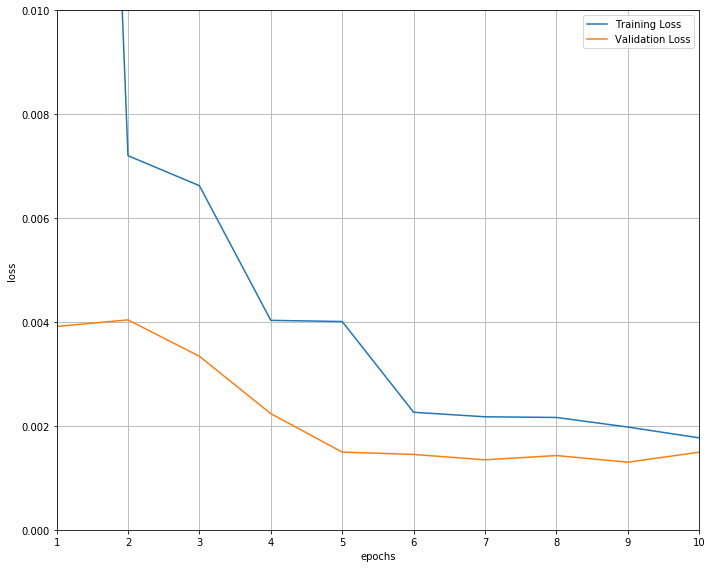

In [8]:

# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(all_train_losses)+1),all_train_losses, label='Training Loss')
plt.plot(range(1,len(all_valid_losses)+1),all_valid_losses,label='Validation Loss')

# find position of lowest validation loss
# minposs = valid_loss.index(min(valid_loss))+1 
# plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.01) # consistent scale
plt.xlim(1, len(all_train_losses)) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
dataloader_val_pred_0 = DataLoader(val_set_0, batch_size = 1) 

network = Network_Digits().cuda()
network.load_state_dict(torch.load('checkpoint_{}.pt'.format(0)))
preds_val_0 = predict(network, dataloader_val_pred_0)

balanced_accuracy_score(val_set_0[:][1],preds_val_0)

0.9965407869417329